In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
import pandas as pd

In [2]:
data = pd.read_excel("Raw_data.xls",index_col=0)
data.head()

,Join_Count,TARGET_FID,OBJECTID,Cod_Uniq_F,Cod_Uniq,Name_Hoze,Cod_Hoze,Name_Mehva,Y,X,...,Mahdode_Ab,Mahdode_Ma,Mahdode_Sh,Onvan_File,Date_1,Seg_name,Long_,Lat,ID,Unique_ID
OBJECTID_1,,,,,,,,,,,,,,,,,,,,,
1,1,1,168,,H3-29R,حوزه نيشابور,,نیشابور-سبزوار,1.368700e+06,429537.9005,...,1,0,1,,1997.06.19,59.0,58.778848,36.237378,42,59-42
2,1,2,171,,H3-43R,حوزه نيشابور,,نیشابور-سبزوار,1.366845e+06,426071.3530,...,1,0,1,,1997.06.28,58.0,58.739444,36.221944,42,58-42
3,1,3,179,,H3-29R,حوزه نيشابور,,نیشابور-سبزوار,1.368701e+06,429562.8506,...,1,0,1,,1997.08.13,59.0,58.779169,36.237341,44,59-44
4,1,4,183,,H3-36R,حوزه نيشابور,,نیشابور-سبزوار,1.367938e+06,427722.2649,...,1,0,1,,1997.07.15,59.0,58.758239,36.231234,20,59-20
5,1,5,186,,H3-32R,حوزه نيشابور,,نیشابور-سبزوار,1.368537e+06,428670.2353,...,1,0,1,,1997.07.14,59.0,58.769115,36.236176,30,59-30


In [3]:
data.drop(columns=data.columns[0:115],inplace=True)

In [47]:
data_lables = pd.Series([1000], index=[1000])
data_lables

1000    1000
dtype: int64

In [48]:
for i in range(60):
    df = data.loc[data["Seg_name"] == i]
    if len(df)>2:    
        clusterer = DBSCAN(eps=0.0025, min_samples=3)
        clusterer.fit(df[['Long_', 'Lat']])
        lbls = pd.Series(clusterer.labels_, index=df.index)
        data_lables = data_lables.append(lbls)

In [58]:
num_clusters = len(set(data_lables))
clusters = pd.Series([df[['Long_', 'Lat']][data_lables == n] for n in range(num_clusters)])
print('Number of clusters: {}'.format(num_clusters))

Number of clusters: 10


C:\Users\SSP\AppData\Local\Temp/ipykernel_12404/2080250932.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  clusters = pd.Series([df[['Long_', 'Lat']][data_lables == n] for n in range(num_clusters)])


In [59]:
data_lables

1000    1000
17         0
363        0
370        0
482        1
        ... 
785        3
791        3
867        3
878        3
879        1
Length: 858, dtype: int64

In [49]:
data_lables.value_counts()

 0       299
-1       194
 1       139
 2        91
 3        72
 5        25
 4        16
 6        14
 7         7
 1000      1
dtype: int64

In [50]:
clusterer.core_sample_indices_

array([ 0,  1,  2,  3,  4,  5,  6,  8, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 21, 22, 23, 25, 26, 27, 28, 29, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48], dtype=int64)

In [57]:
clusterer.labels_

array([ 0,  0,  1,  2,  0,  0,  0, -1,  0, -1,  2,  0,  0,  2,  3,  1,  1,
        1,  0,  3, -1,  2,  3,  1,  2,  0,  0,  3,  3,  3,  1,  2,  0,  0,
        3,  3,  0,  2,  2,  0,  0,  1,  3,  2,  3,  3,  3,  3,  1],
      dtype=int64)

In [34]:
clusterer.n_features_in_

2

In [42]:
#clusterer.get_params(deep=True)

In [41]:
#clusterer.feature_names_in_

In [289]:
data_lables.to_excel("v1.xlsx")

In [37]:
data_lables = pd.Series([1000], index=[1000])
data_lables

1000    1000
dtype: int64

In [38]:
kms_per_radian = 6371.0088
epsilon = 0.25 / kms_per_radian

for i in range(60):
    df = data.loc[data["Seg_name"] == i]
    if len(df)>2:
        clusterer = DBSCAN(eps=epsilon, min_samples=3, algorithm='ball_tree', metric='haversine').fit(np.radians(df[['Long_', 'Lat']]))
        lbls = pd.Series(clusterer.labels_, index=df.index)
        data_lables = data_lables.append(lbls)

In [39]:
data_lables.value_counts()

 0       289
-1       210
 1       136
 2        88
 3        69
 4        22
 5        22
 6        14
 7         7
 1000      1
dtype: int64

In [45]:
clusterer.components_

array([[1.02588443, 0.63246156],
       [1.02589004, 0.63246092],
       [1.02552473, 0.63235433],
       [1.02571456, 0.63244058],
       [1.02588443, 0.63246156],
       [1.02589437, 0.63246072],
       [1.02589971, 0.63245988],
       [1.02589004, 0.63246092],
       [1.02567623, 0.63242603],
       [1.02587536, 0.632462  ],
       [1.02587536, 0.632462  ],
       [1.02567623, 0.63242603],
       [1.02525548, 0.6322204 ],
       [1.02555137, 0.63236596],
       [1.02553424, 0.63235853],
       [1.02554808, 0.63236441],
       [1.02580157, 0.63245862],
       [1.0253169 , 0.63224507],
       [1.02573049, 0.63244362],
       [1.02533527, 0.63225315],
       [1.02550104, 0.6323416 ],
       [1.02582937, 0.63246073],
       [1.02528322, 0.63223186],
       [1.02528322, 0.63223186],
       [1.02527708, 0.63222963],
       [1.02573049, 0.63244362],
       [1.02584347, 0.63246169],
       [1.02581583, 0.63245976],
       [1.02529562, 0.63223676],
       [1.02531791, 0.63224552],
       [1.

In [40]:
data_lables.to_excel("v2.xlsx")

In [5]:
import pysal
import contextily
import geopandas
import seaborn as sns

In [16]:
geo_data = geopandas.read_file("shp_layer/Accidents_96_97_98.shp")

In [33]:
geo_data.crs

<Projected CRS: EPSG:32640>
Name: WGS 84 / UTM zone 40N
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 54°E and 60°E, northern hemisphere between equator and 84°N, onshore and offshore. Islamic Republic of Iran. kazakhstan. Oman. Russian Federation. Saudi Arabia. Turkmenistan. United Arab Emirates. Uzbekistan.
- bounds: (54.0, 0.0, 60.0, 84.0)
Coordinate Operation:
- name: UTM zone 40N
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

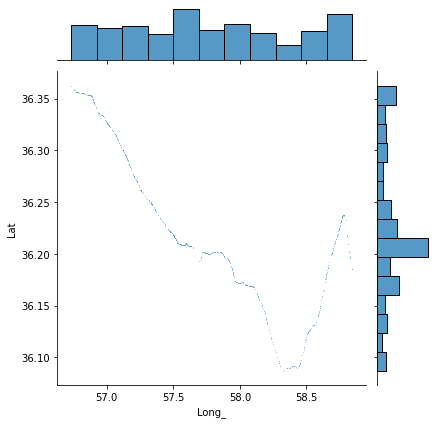

In [32]:
sns.jointplot(x='Long_', y='Lat', data=data, s=0.5);
#contextily.add_basemap(joint_axes.ax_joint,crs=geo_data.crs.to_string(),source=contextily.providers.CartoDB.PositronNoLabels)

C:\Users\SSP\miniconda3\envs\python-gis\lib\site-packages\contextily\tile.py:632: UserWarning: The inferred zoom level of 28 is not valid for the current tile provider (valid zooms: 0 - 18).
  warnings.warn(msg)


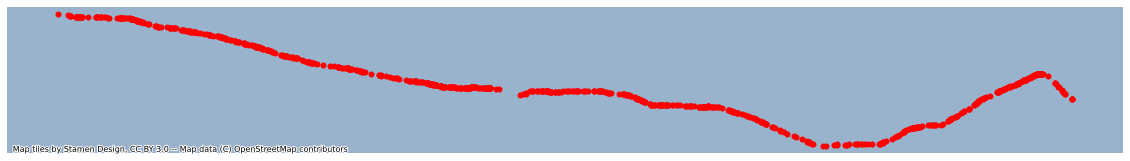

In [64]:
# Run DBSCAN
clusterer = DBSCAN(eps=500, min_samples=3)
clusterer.fit(data[['Long_', 'Lat']])
# Turn labels into a Series
lbls = pd.Series(clusterer.labels_, index=data.index)
# Setup figure and axis
f, ax = plt.subplots(1, figsize=(20, 20))
# Subset points that are not part of any cluster (noise)
noise = data.loc[lbls==-1, ['Long_', 'Lat']]
# Plot noise in grey
ax.scatter(noise['Long_'], noise['Lat'], c='grey', s=5, linewidth=0)
# Plot all points that are not noise in red
# NOTE how this is done through some fancy indexing, where
#      we take the index of all points (db) and substract from
#      it the index of those that are noise
ax.scatter(
    data.loc[data.index.difference(noise.index), 'Long_'],
    data.loc[data.index.difference(noise.index), 'Lat'],
    c='red', 
    linewidth=0
)
# Add basemap
contextily.add_basemap(
    ax, 
    #source=contextily.providers.CartoDB.Positron
)
# Remove axes
ax.set_axis_off()
# Display the figure
plt.show()

In [63]:
lbls.value_counts()

0    880
dtype: int64

In [ ]:
data = np.array([[-37.530, 3.109, -16.452],
                [40.247, 5.483, -15.209],
                [-31.920, 12.584, -12.916],
                [-32.760, 14.072, -13.749],
                [-37.100, 1.953, -15.720],
                [-32.143, 12.990, -13.488],
                [-41.077, 4.651, -15.651], 
                [-34.219, 13.611, -13.090],
                [-33.117, 15.875, -13.738]])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], s=300)
ax.view_init(azim=200)
plt.show()

model = DBSCAN(eps=2.5, min_samples=2)
model.fit_predict(data)
pred = model.fit_predict(data)

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(data[:,0], data[:,1], data[:,2], c=model.labels_, s=300)
ax.view_init(azim=200)
plt.show()

print("number of cluster found: {}".format(len(set(model.labels_))))
print('cluster for each point: ', model.labels_)